In [2]:
import torch as th
from torch import nn
th.__version__

'1.13.1+cu117'

### Data preparing and Loading

Data can be almost anything  in machine learning
* Excel spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

In [3]:
# Create known paramaters
weight = 0.7
bias = 0.3

# Create Data
start = 0
end = 1
step = 0.02
X = th.arange(start,end,step)
y = weight*X + bias

X[:10], y[:10]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260]))

In [4]:
len(X), len(y)

(50, 50)

In [5]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

#### Lets Visualize

In [6]:
import matplotlib.pyplot as plt

In [7]:
def plot_predictions(train_data=X_train, test_data=X_test, train_labels=y_train, test_labels=y_test, predictions=None):
    """Plots training data , Test data and co,pares apredictions"""

    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c='b', s=8, label="Training data")
    plt.scatter(test_data, test_labels, c='g', s=8, label="Testing data")

    if predictions is not None:
        # plto predictions
        plt.scatter(test_data, predictions, c="r", s= 8, label="Predictions")
    
    plt.legend(prop={"size":14})


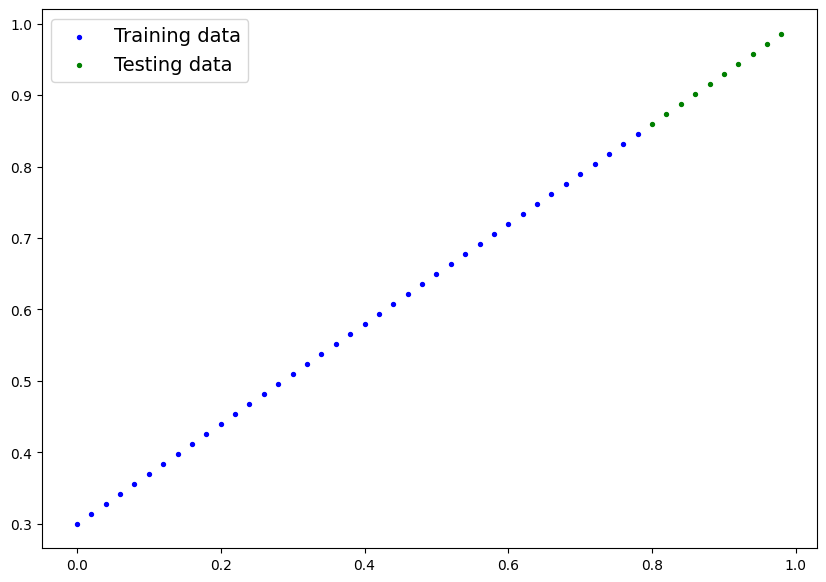

In [8]:
plot_predictions()

### Creating our first Pytorch Model : Linear Regression

In [9]:
# Create linear Regression Model Class
class LinearRegressionModel(nn.Module):

    def __init__(self) -> None:
        super().__init__()
        self.weights = nn.Parameter(th.randn(1, requires_grad=True, dtype=th.float))
        self.bias = nn.Parameter(th.randn(1, requires_grad=True, dtype=th.float))

    def forward(self, x: th.Tensor) -> th.Tensor:  # x is input data
        return self.weights*x + self.bias


#### Pytorch Model Builfing Essentials
* torch.nn - contains allof the buildings for computational graphs
* Parameter - what parameter should our model try and learn, often a Pytorch layer from torch.nn will set this for us 
* torch.nn.Module - base class for all Neural Network Modules, if you subclass it , overrive the forware
* torch.optim - where optimizers in Pytorch live, helps in GD
* def forward() - All nn.Module subclasses require you to overRove forward computation

#### Checking the contents of the Pytorch Model

In [11]:
# Create Random Seed
th.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check the Parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
# List Named Parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Predictions using torch.inference_mode()

In [14]:
with th.inference_mode():
    y_preds = model_0(X_test)

y_test, y_preds


(tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
         0.9860]),
 tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
         0.4588]))

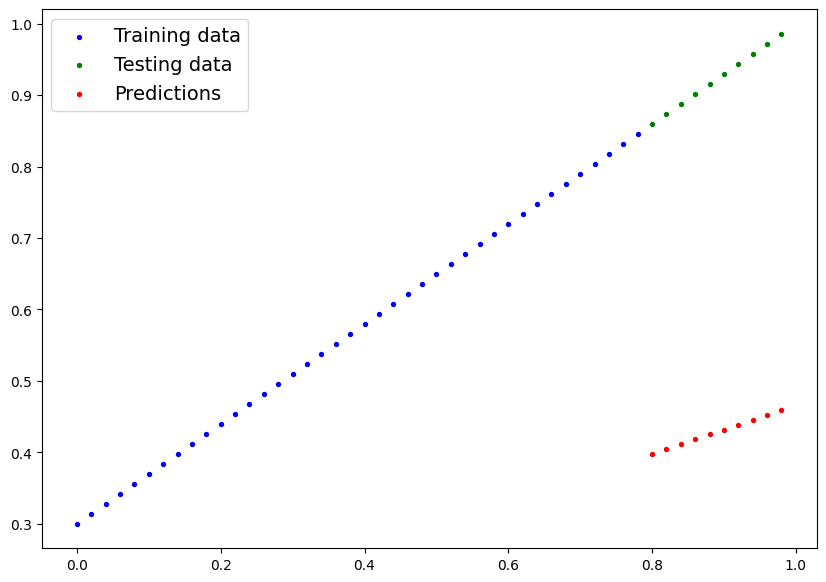

In [15]:
plot_predictions(predictions=y_preds)

#### Training Model
1. Changing the parameters from just random numbers to the optimal parameters
2. To improve we need to know how bad are we doing rn, one way to calcualet that is using `Loss Function`
3. Now we need to improve upon that loss, we use something called `Optimizer`
    * `Optimizers` updates weights and biases of the models
4. And specifically for pytorch, we need:
    * A training Loop
    * A testing Loop
    

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
# Setup a loss Function
loss_fn = nn.L1Loss()

# Setup and Optimizer
optimizer = th.optim.SGD(params= model_0.parameters)